# Normalization of synthetic aperture radar




In [15]:
import xarray as xr
from pathlib import Path

In [16]:
def _preprocess(x):
    return x.rename({"band_data": Path(x.encoding["source"]).parent.stem}).squeeze("band").drop_vars("band")

ds = xr.open_mfdataset("../data/A0105/EQUI7_EU010M/E047N012T1/**/*.tif", engine="rasterio", combine='nested', preprocess=_preprocess)
ds

<xarray.Dataset> Size: 1GB
Dimensions:      (x: 10000, y: 10000)
Coordinates:
  * x            (x) float64 80kB 4.7e+06 4.7e+06 4.7e+06 ... 4.8e+06 4.8e+06
  * y            (y) float64 80kB 1.3e+06 1.3e+06 1.3e+06 ... 1.2e+06 1.2e+06
    spatial_ref  int64 8B 0
Data variables:
    gmr          (y, x) float32 400MB dask.array<chunksize=(1, 10000), meta=np.ndarray>
    plia         (y, x) float32 400MB dask.array<chunksize=(1, 10000), meta=np.ndarray>
    sig0         (y, x) float32 400MB dask.array<chunksize=(1, 10000), meta=np.ndarray>

In [17]:
ds_aoi = ds.sel(x=slice(4.78e6, 4.795e6), y=slice(1.28e6, 1.265e6)).compute()
ds_aoi["sig0"] = ds_aoi["sig0"] / 100
ds_aoi["gmr"] = ds_aoi["gmr"] / 100
ds_aoi

<xarray.Dataset> Size: 27MB
Dimensions:      (x: 1500, y: 1500)
Coordinates:
  * x            (x) float64 12kB 4.78e+06 4.78e+06 ... 4.795e+06 4.795e+06
  * y            (y) float64 12kB 1.28e+06 1.28e+06 ... 1.265e+06 1.265e+06
    spatial_ref  int64 8B 0
Data variables:
    gmr          (y, x) float32 9MB -9.16 -10.34 -8.54 ... -7.67 -8.39 -8.35
    plia         (y, x) float32 9MB 2.744e+03 2.798e+03 ... 3.295e+03 3.258e+03
    sig0         (y, x) float32 9MB -8.82 -10.01 -8.25 -6.24 ... -7.65 -8.5 -9.0

## What differences can one spot in these images?

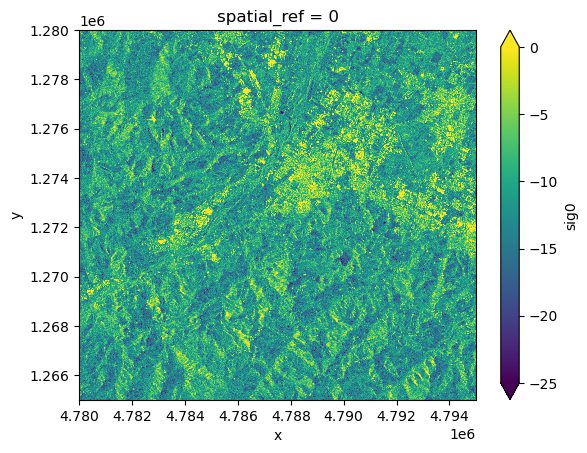

In [18]:
ds_aoi.sig0.plot(vmin=-25,vmax=0) 

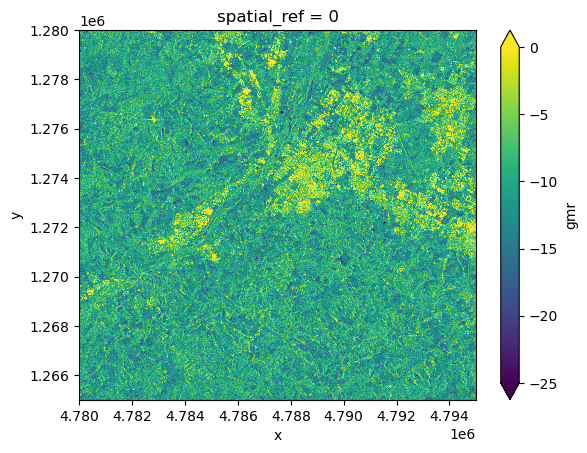

In [19]:
ds_aoi.gmr.plot(vmin=-25,vmax=0) 